# Using Visualizer

### Cloning the git repo

In [1]:
! git clone https://github.com/dorm12/Visualizing_CNN_Filters.git

Cloning into 'Visualizing_CNN_Filters'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 17 (delta 3), reused 17 (delta 3), pack-reused 0
Unpacking objects: 100% (17/17), done.


### Loading a model

In [2]:
# import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
model_path = '/content/drive/MyDrive/Exploring_The_Black_Box_Called_CNN/small_net_model3'
model = load_model(model_path)

## Now: Using the Visualizer

In [5]:
# from Visualizing_CNN_Filters.API import Visualizing_Filters as VF
from Visualizing_CNN_Filters.API import main as Visualizer

In [6]:
[layer.name for layer in model.layers]

['conv2d',
 'max_pooling2d',
 'conv2d_1',
 'max_pooling2d_1',
 'conv2d_2',
 'global_average_pooling2d',
 'dense']

In [7]:
vslr = Visualizer.Visualizer(model, conv_layer_name='conv2d_2')

### Visualizing filters of 'conv2d_2'

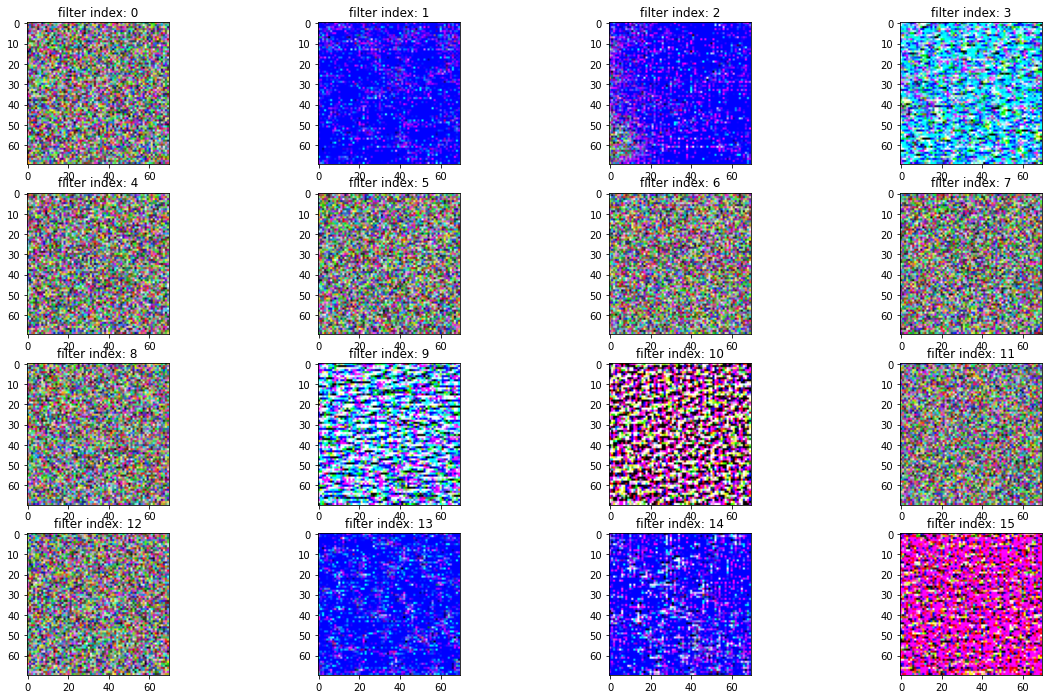

In [8]:
amount_of_filters = vslr.get_conv_layer().output_shape[-1]
f, ax = plt.subplots(int(amount_of_filters/4), 4, figsize=(20,12))
fl = ax.flatten()
for i in range(amount_of_filters):
  loss, img = vslr.feature_visualization(filter_index=i, img_width=120, img_height=120)
  fl[i].imshow(img)
  fl[i].set_title(f'filter index: {i}')
plt.show()

### Changing the visualized layer

In [9]:
vslr.set_target_layer('max_pooling2d')

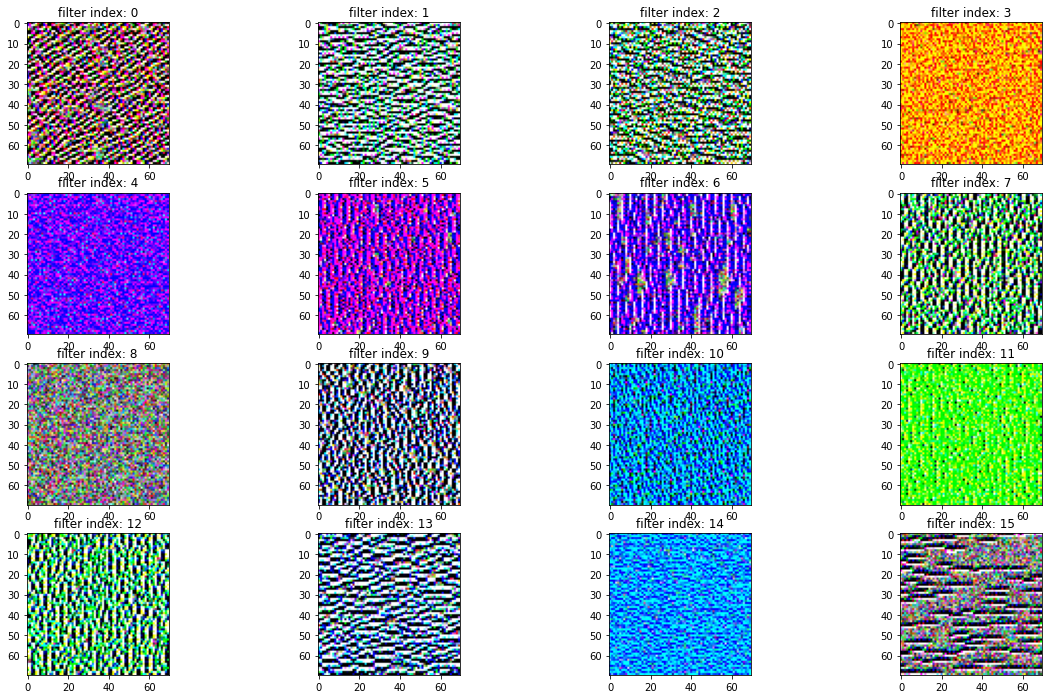

In [10]:
amount_of_filters = vslr.get_conv_layer().output_shape[-1]
f, ax = plt.subplots(int(amount_of_filters/4), 4, figsize=(20,12))
fl = ax.flatten()
for i in range(amount_of_filters):
  loss, img = vslr.feature_visualization(filter_index=i, img_width=120, img_height=120)
  fl[i].imshow(img)
  fl[i].set_title(f'filter index: {i}')
plt.show()

## Image activation

Loading just ten pictures


In [12]:
import cv2
import numpy as np
images = np.load('/content/drive/MyDrive/Exploring_The_Black_Box_Called_CNN/Blood_Cells/ten_images.npy')
images = [cv2.resize(image, (120, 120))/255 for image in images]
images = np.array(images)
images.shape, images.min(), images.max()

((10, 120, 120, 3), 0.0, 1.0)

1/1 [==============================] - 0s 34ms/step


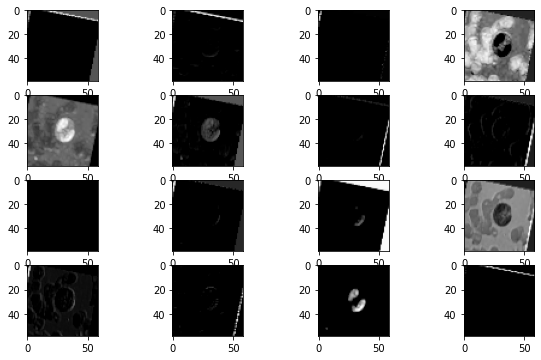

In [14]:
vslr.print_activations(images[0], layer_name='max_pooling2d', amount_of_filters=15) # There's a bug to be fixed in regard to 'amount_of_filters'